In [1]:
import importlib
import config
importlib.reload(config)
print('Using classifier: ', config.classifier.__class__.__name__)
print('Using feature selection: ', config.feature_selection)
print('Using feature significance test: ', config.significance_test)
print('imblearn sampling algo:', config.sampling_algo.__class__.__name__)
print('Significance level during RFE', config.alpha)
print('Number of RFE features', config.no_selected_rfe)
print('Which type of model: \n', 'Only campaing: ', config.only_campaign, 
      '; Only non campaign: ', config.only_non_campaign)
print('Selected categorical features:\n', config.selected_categorical_features)
print('Selected oridnal columns:\n', config.campaign_related_features)


Using classifier:  LogisticRegression
Using feature selection:  True
Using feature significance test:  False
imblearn sampling algo: SMOTE
Significance level during RFE 0.1
Number of RFE features 20
Which type of model: 
 Only campaing:  True ; Only non campaign:  False
Selected categorical features:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Selected oridnal columns:
 ['contact', 'month', 'day_of_week']


In [2]:
# remove campaign related features
config.selected_categorical_features = ['job', 'marital', 'education', 'default',
                                        'housing', 'loan']
config.selected_ordinal_features = ['age', "cons.price.idx", "cons.conf.idx", "y"]

import campaign
importlib.reload(campaign)

<module 'campaign' from '/home/sudiptra/repos/campaign/campaign.py'>

In [3]:
print(config.selected_categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [4]:
X, y = campaign.data_prep(config)

In [5]:
clf, best_score, coefs, X_test, y_test = campaign.analyze(config, X, y)

Before balancing dataset and feature selection
Accuracy on test set: 0.87
Test Set confusion matrix:
    pred_0  pred_1
0    4592      26
1     638      37
Classification Report:
 {'precision': 0.5873015873015873, 'recall': 0.054814814814814816, 'f1-score': 0.10027100271002712, 'support': 675, 'fbeta2': 0.5357706093189964}
Classification report:
 {'0': {'precision': 0.8780114722753346, 'recall': 0.9943698570809875, 'f1-score': 0.9325751421608449, 'support': 4618}, '1': {'precision': 0.5873015873015873, 'recall': 0.054814814814814816, 'f1-score': 0.10027100271002712, 'support': 675, 'fbeta2': 0.5357706093189964}, 'micro avg': {'precision': 0.8745512941621009, 'recall': 0.8745512941621009, 'f1-score': 0.8745512941621009, 'support': 5293}, 'macro avg': {'precision': 0.732656529788461, 'recall': 0.5245923359479011, 'f1-score': 0.5164230724354361, 'support': 5293}, 'weighted avg': {'precision': 0.8409381353478305, 'recall': 0.8745512941621009, 'f1-score': 0.826433956797289, 'support': 5293}

In [6]:
import utils
importlib.reload(utils)

<module 'utils' from '/home/sudiptra/repos/campaign/utils.py'>

Average precision-recall score: 0.30


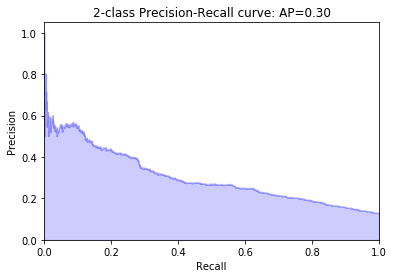

In [7]:
utils.plot_precision_recall_curve(clf, X_test[coefs.keys()], y_test)

   pred_0  pred_1
0     111    4507
1       7     668


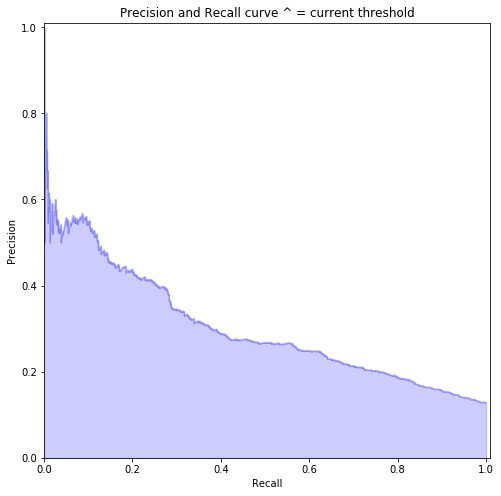

              precision    recall  f1-score   support

           0       0.94      0.02      0.05      4618
           1       0.13      0.99      0.23       675

   micro avg       0.15      0.15      0.15      5293
   macro avg       0.53      0.51      0.14      5293
weighted avg       0.84      0.15      0.07      5293



In [8]:
utils.precision_recall_threshold(clf, X_test[coefs.keys()], y_test, t=0.18)
y_adjusted_pred = clf.predict_proba(X_test[coefs.keys()])[:, 1] > 0.18
print(utils.classification_report(y_test, y_adjusted_pred))

# With threshold of 0.18 we hit the FP ~ 10FN target, 
# which was set based on the cost of the campaign vs the cost of a missed card sale.

Average precision-recall score: 0.30


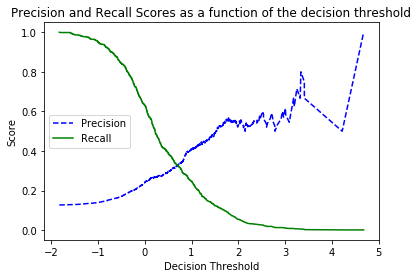

In [9]:
utils.plot_precision_recall_vs_threshold(clf, X_test[coefs.keys()], y_test)

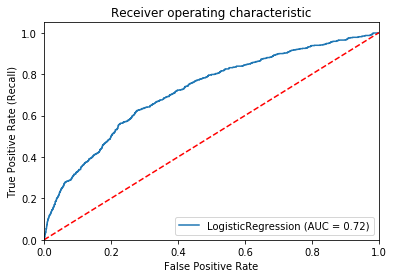

In [10]:
utils.plot_roc(clf, X_test[coefs.keys()], y_test)

In [11]:
print(len(coefs))
coefs.keys()

37


dict_keys(['cons.price.idx', 'age', 'cons.conf.idx', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes'])